<a href="https://colab.research.google.com/github/oamerl/machine-learning-projects/blob/main/Machine-Learning/new_york_house_price_prediction/New_York_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries

import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import scipy
from scipy import stats
from scipy.stats import skew, norm
import scipy.stats as stats
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
from yellowbrick.regressor import ResidualsPlot

from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
import sklearn.model_selection as ms
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

!pip install -q cliffs-delta
from cliffs_delta import cliffs_delta

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# change max_columns that defaults to 20 to be able to see all features statistics
pd.options.display.max_columns = 100
pd.options.display.width = None

The dataset used is collected from the New York government. You can find the
detailed data description (columns, building code) here: https://www.nyc.gov/site/finance/taxes/property-rolling-sales-data.page


#Reading and Exploring Data

In [ ]:
# load data and check basic data type information
all_data = pd.read_csv('20to22NYC.csv')

# printing informaiton about the DataFrame including such as the dtypes and columns, non-null values, and memory usage
all_data.info()
print('\n Table Beginning Sample')

# checking the beginning of the table to see the structure of the ddta
all_data.head(2)
print('\n Table End Sample')

# checking the end of the table
all_data.tail(2)


<ipython-input-3-173acd9eb7e5>:2: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv('20to22NYC.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         258464 non-null  int64  
 1   NEIGHBORHOOD                    258464 non-null  object 
 2   BUILDING CLASS CATEGORY         258464 non-null  object 
 3   TAX CLASS AT PRESENT            258143 non-null  object 
 4   BLOCK                           258464 non-null  int64  
 5   LOT                             258464 non-null  int64  
 6   BUILDING CLASS AT PRESENT       258143 non-null  object 
 7   ADDRESS                         258464 non-null  object 
 8   APARTMENT NUMBER                62945 non-null   object 
 9   ZIP CODE                        258445 non-null  float64
 10  RESIDENTIAL UNITS               199349 non-null  object 
 11  COMMERCIAL UNITS                162951 non-null  object 
 12  TOTAL UNITS     

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,A5,4726 AMBOY ROAD,NaN,10312.0,1.0,0.0,1.0,3067.0,910.0,2002.0,1,A5,0.0,2020-07-02
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,NaN,10312.0,1.0,0.0,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2020-10-02



 Table End Sample


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
258462,4,WOODSIDE,44 CONDO PARKING,4,2324,1152,RG,"63-14 QUEENS BOULEVARD, P-49",P-49,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RG,0.0,2021-09-03
258463,4,WOODSIDE,44 CONDO PARKING,4,2324,1153,RG,"63-14 QUEENS BOULEVARD, P-50",P-50,11377.0,NaN,1,1,NaN,NaN,2008.0,4,RG,0.0,2021-09-03


In [ ]:
# checking the statistics of all types of attributes in the table
all_data.describe(include='all')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,258464.000000,258464,258464,258143,258464.000000,258464.000000,258143,258464,62945,258445.000000,199349.0,162951.0,205304.0,1.569960e+05,1.569960e+05,240618.000000,258464.000000,258464,2.584640e+05,258464
unique,NaN,255,44,10,NaN,NaN,174,241541,9040,NaN,446.0,116.0,475.0,NaN,NaN,NaN,NaN,173,NaN,1096
top,NaN,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,R4,55 AUSTIN PLACE,3A,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,R4,NaN,2022-06-30
freq,NaN,8419,57236,118084,NaN,NaN,41698,24,975,NaN,69433.0,102435.0,58318.0,NaN,NaN,NaN,NaN,41602,NaN,694
mean,2.982249,NaN,NaN,NaN,4205.347228,390.798494,NaN,NaN,NaN,10850.341763,NaN,NaN,NaN,6.006378e+03,5.488587e+03,1952.672522,1.636955,NaN,1.480856e+06,NaN
std,1.291469,NaN,NaN,NaN,3583.533963,663.856622,NaN,NaN,NaN,562.709495,NaN,NaN,NaN,1.139290e+05,4.887278e+04,36.162119,0.783537,NaN,1.049733e+07,NaN
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,10001.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,220.000000,1.000000,NaN,0.000000e+00,NaN
25%,2.000000,NaN,NaN,NaN,1251.000000,22.000000,NaN,NaN,NaN,10305.000000,NaN,NaN,NaN,1.900000e+03,1.224000e+03,1925.000000,1.000000,NaN,0.000000e+00,NaN
50%,3.000000,NaN,NaN,NaN,3273.500000,52.000000,NaN,NaN,NaN,11208.000000,NaN,NaN,NaN,2.500000e+03,1.810000e+03,1950.000000,2.000000,NaN,5.500000e+05,NaN
75%,4.000000,NaN,NaN,NaN,6251.000000,1003.000000,NaN,NaN,NaN,11355.000000,NaN,NaN,NaN,3.909250e+03,2.670000e+03,1977.000000,2.000000,NaN,9.900000e+05,NaN


In [ ]:
# count the total number of missing values for all features
print("The data contains a total of", all_data.isnull().values.sum(), "missing values")

The data contains a total of 624750 missing values


In [ ]:
# column-wise summary of missing values count for each feature
missing = all_data.isna().sum().sort_values(ascending = False)

# filtering on features that have missing values
missing[missing>0]

print("\n")
print("There are", len(missing[missing>0]), "features that have missing values")

APARTMENT NUMBER             195519
LAND SQUARE FEET             101468
GROSS SQUARE FEET            101468
COMMERCIAL UNITS              95513
RESIDENTIAL UNITS             59115
TOTAL UNITS                   53160
YEAR BUILT                    17846
TAX CLASS AT PRESENT            321
BUILDING CLASS AT PRESENT       321
ZIP CODE                         19
dtype: int64



There are 10 features that have missing values


In [ ]:
# top-3 most missed features.
missing[:4]

APARTMENT NUMBER     195519
LAND SQUARE FEET     101468
GROSS SQUARE FEET    101468
COMMERCIAL UNITS      95513
dtype: int64

* The top 3 features that have missing values are: "APARTMENT NUMBER", "LAND SQUARE FEET" and "GROSS SQUARE FEET".
* however the "APARTMENT NUMBER" feature has no numeric merit for the model and will be dropped as it is simialr to an ID
* so the next top 3 features are "LAND SQUARE FEET", "GROSS SQUARE FEET" and "COMMERCIAL UNITS"

<Axes: >

<Axes: >

<Axes: >

<Axes: >

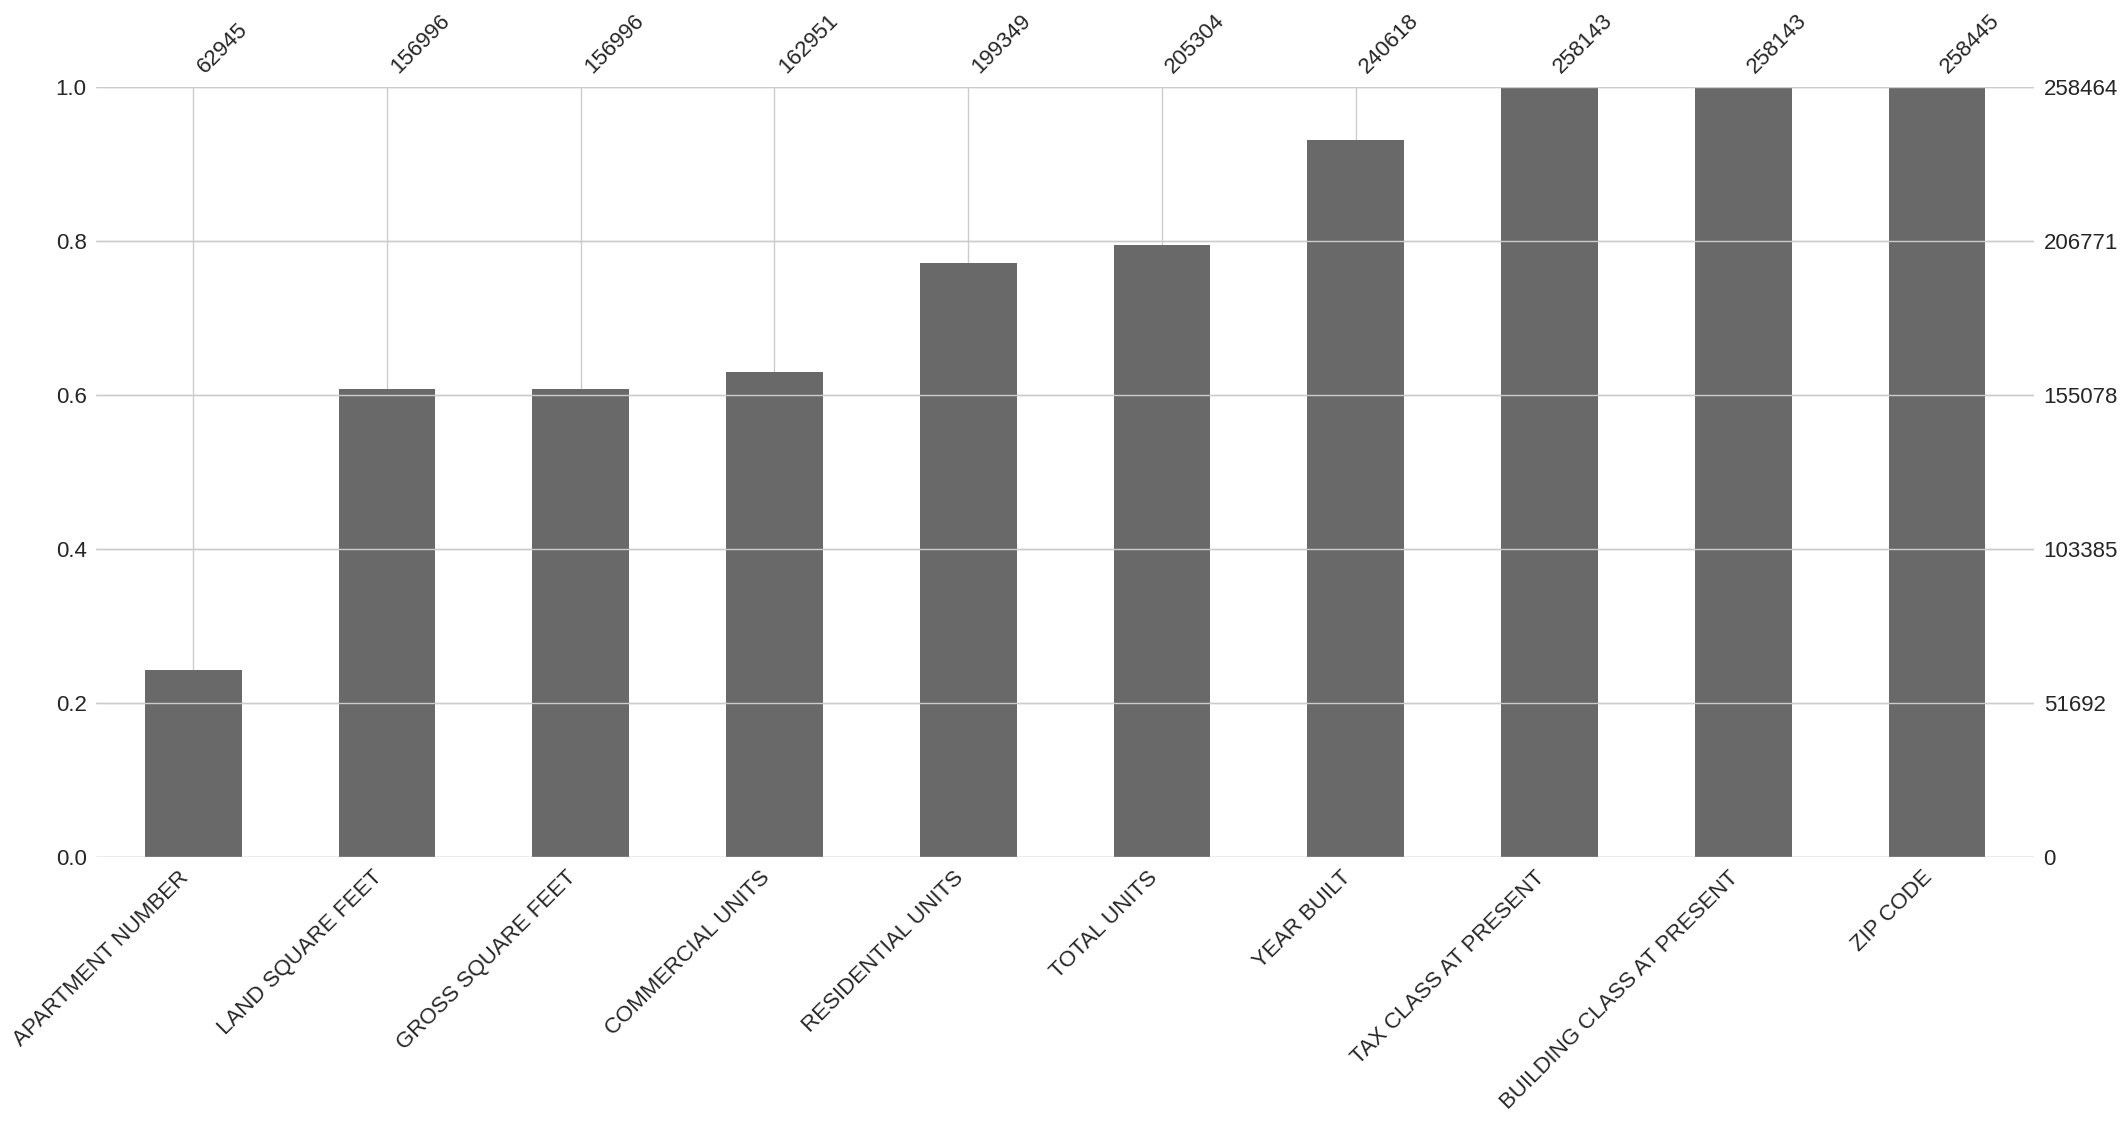

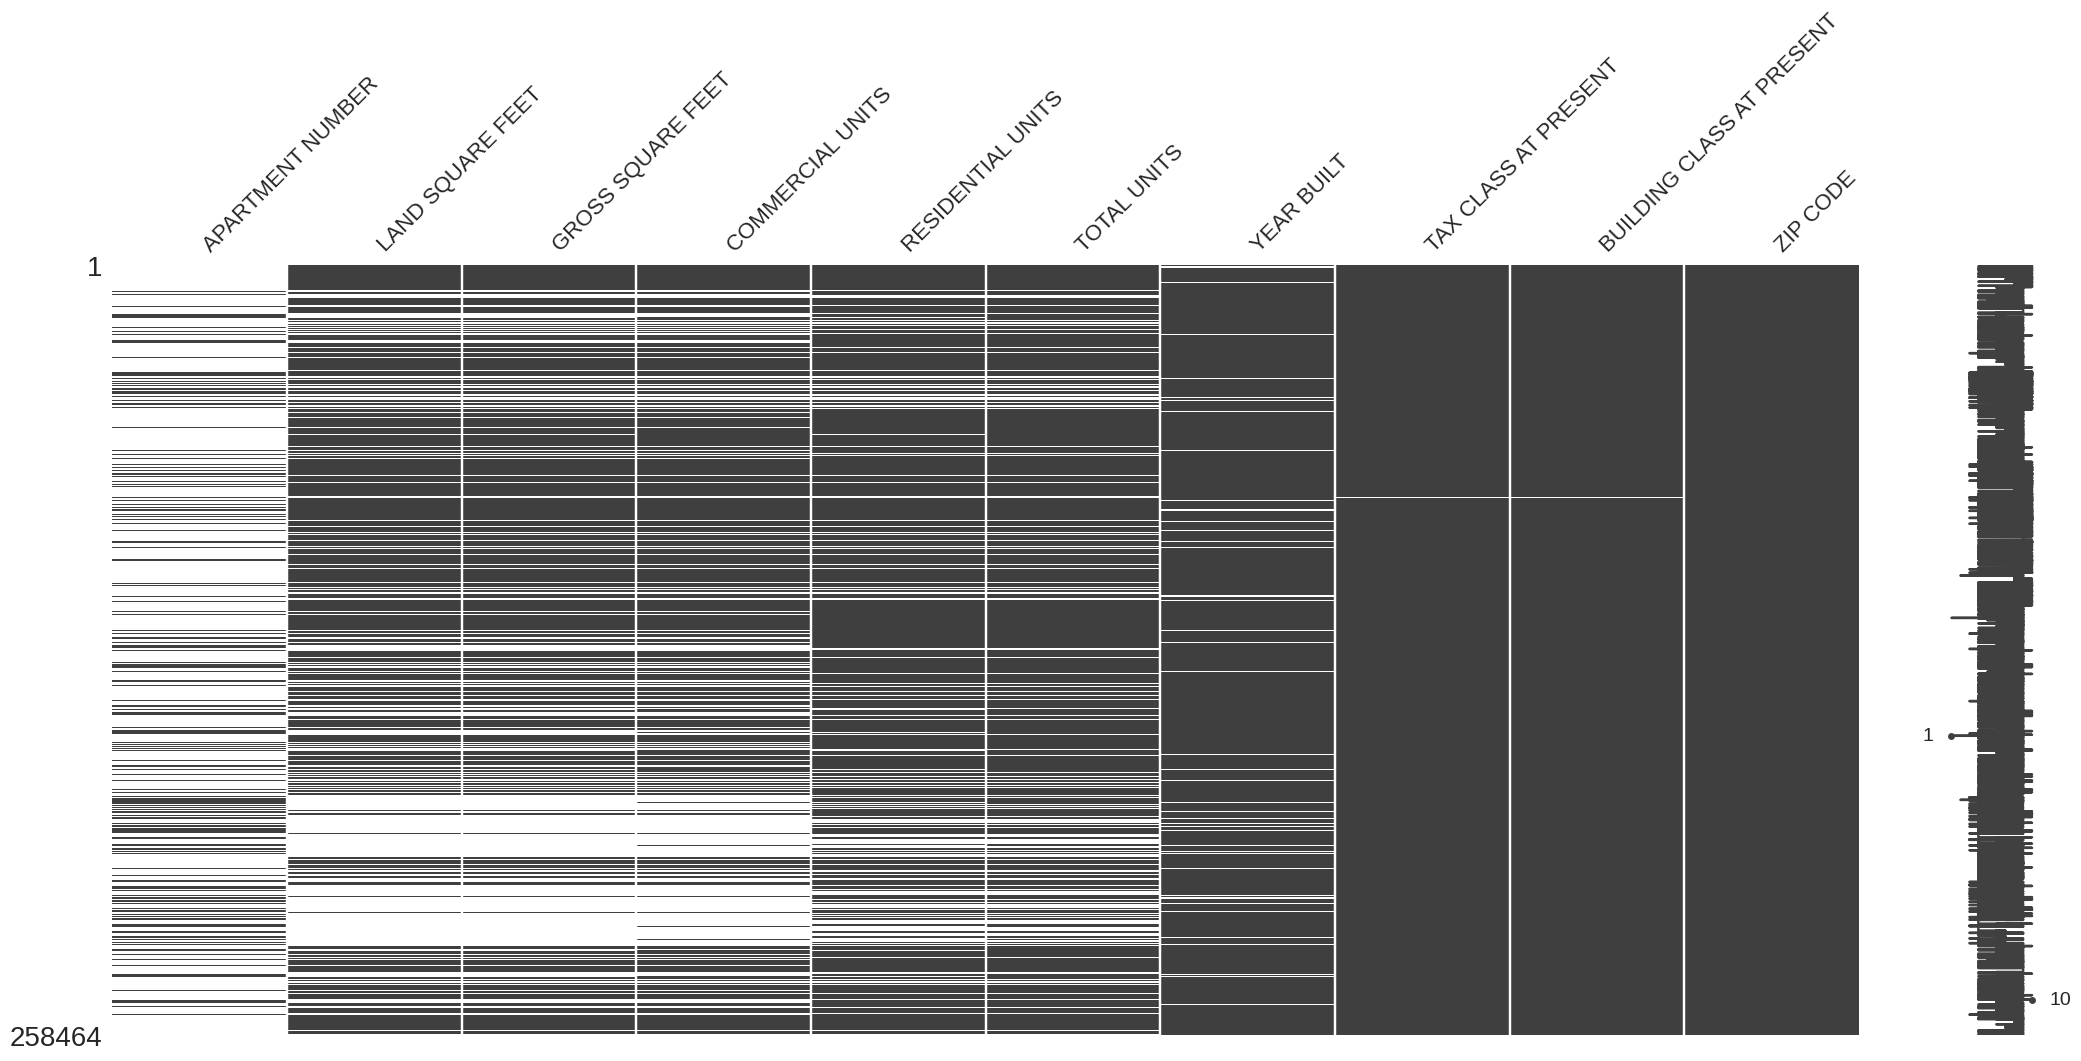

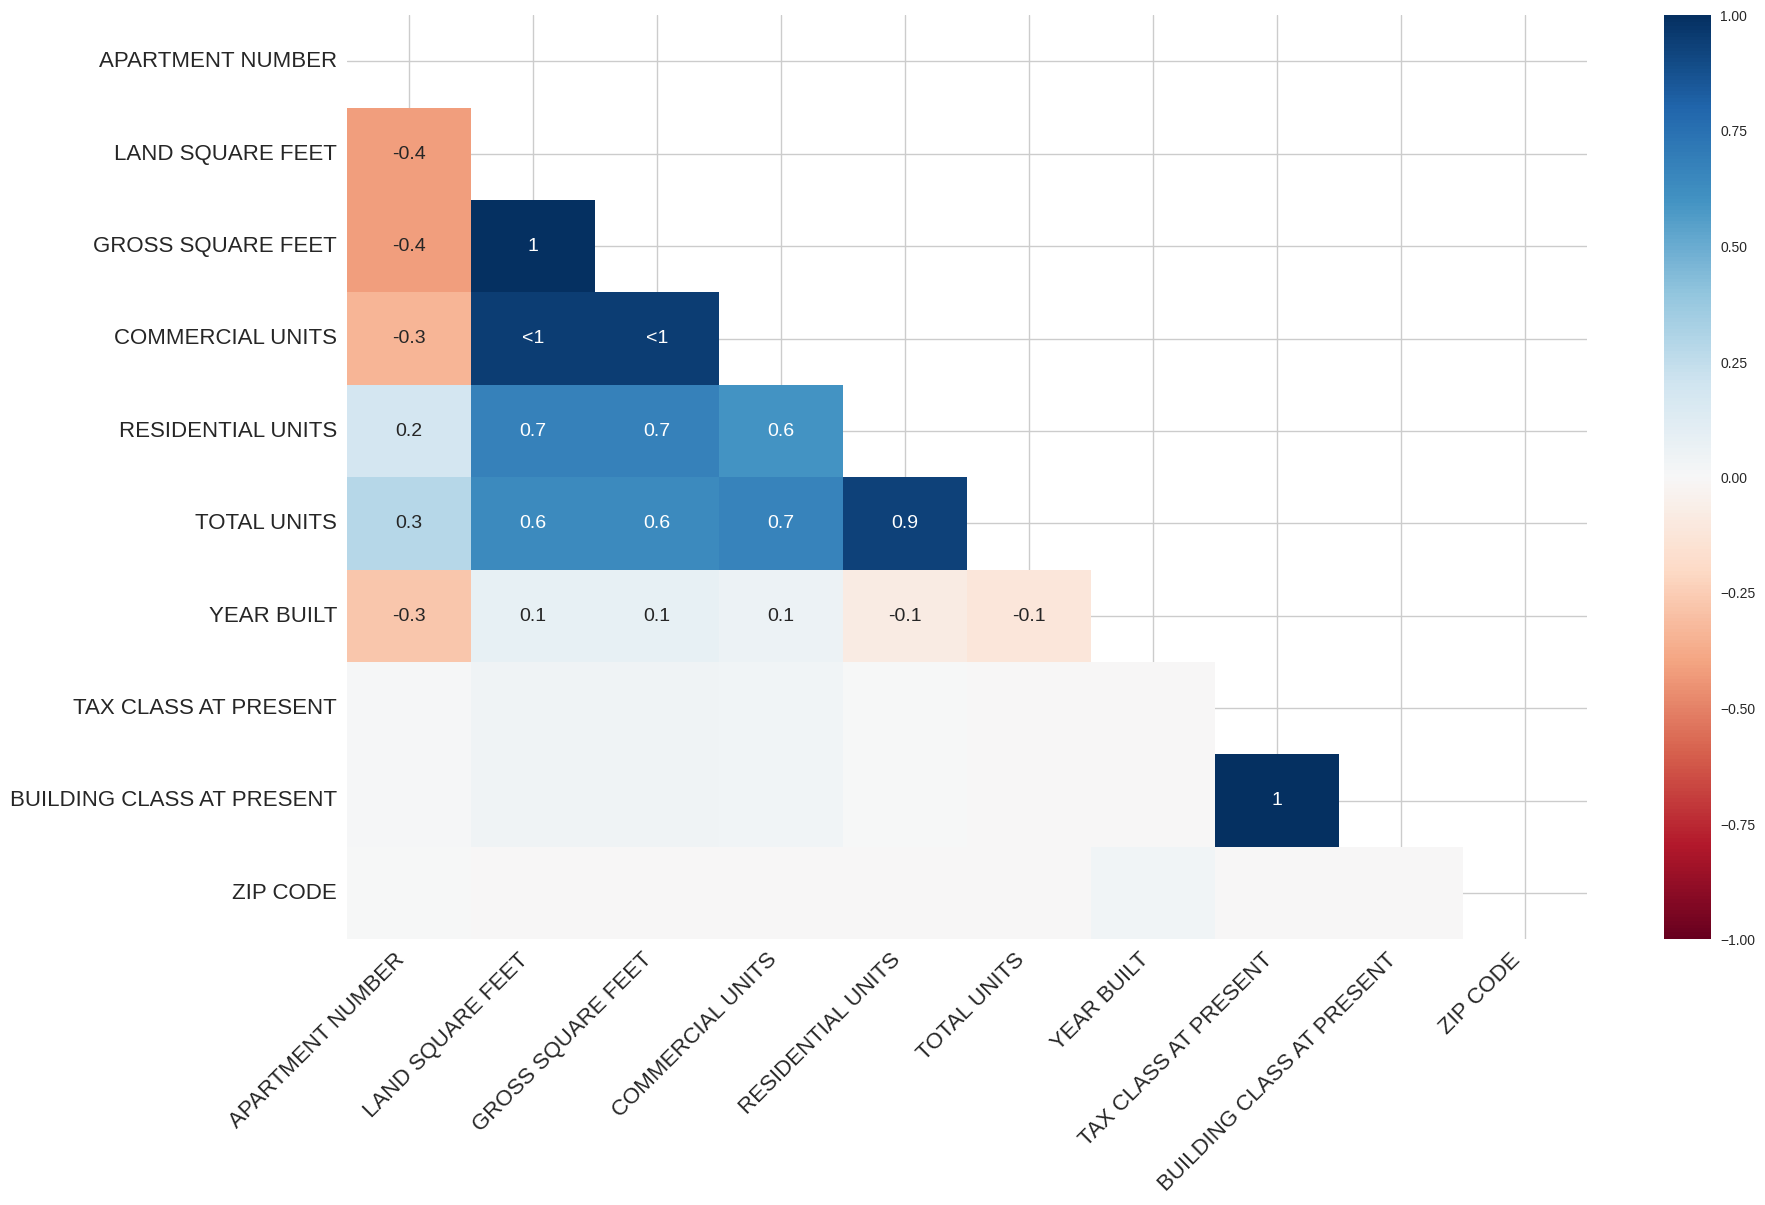

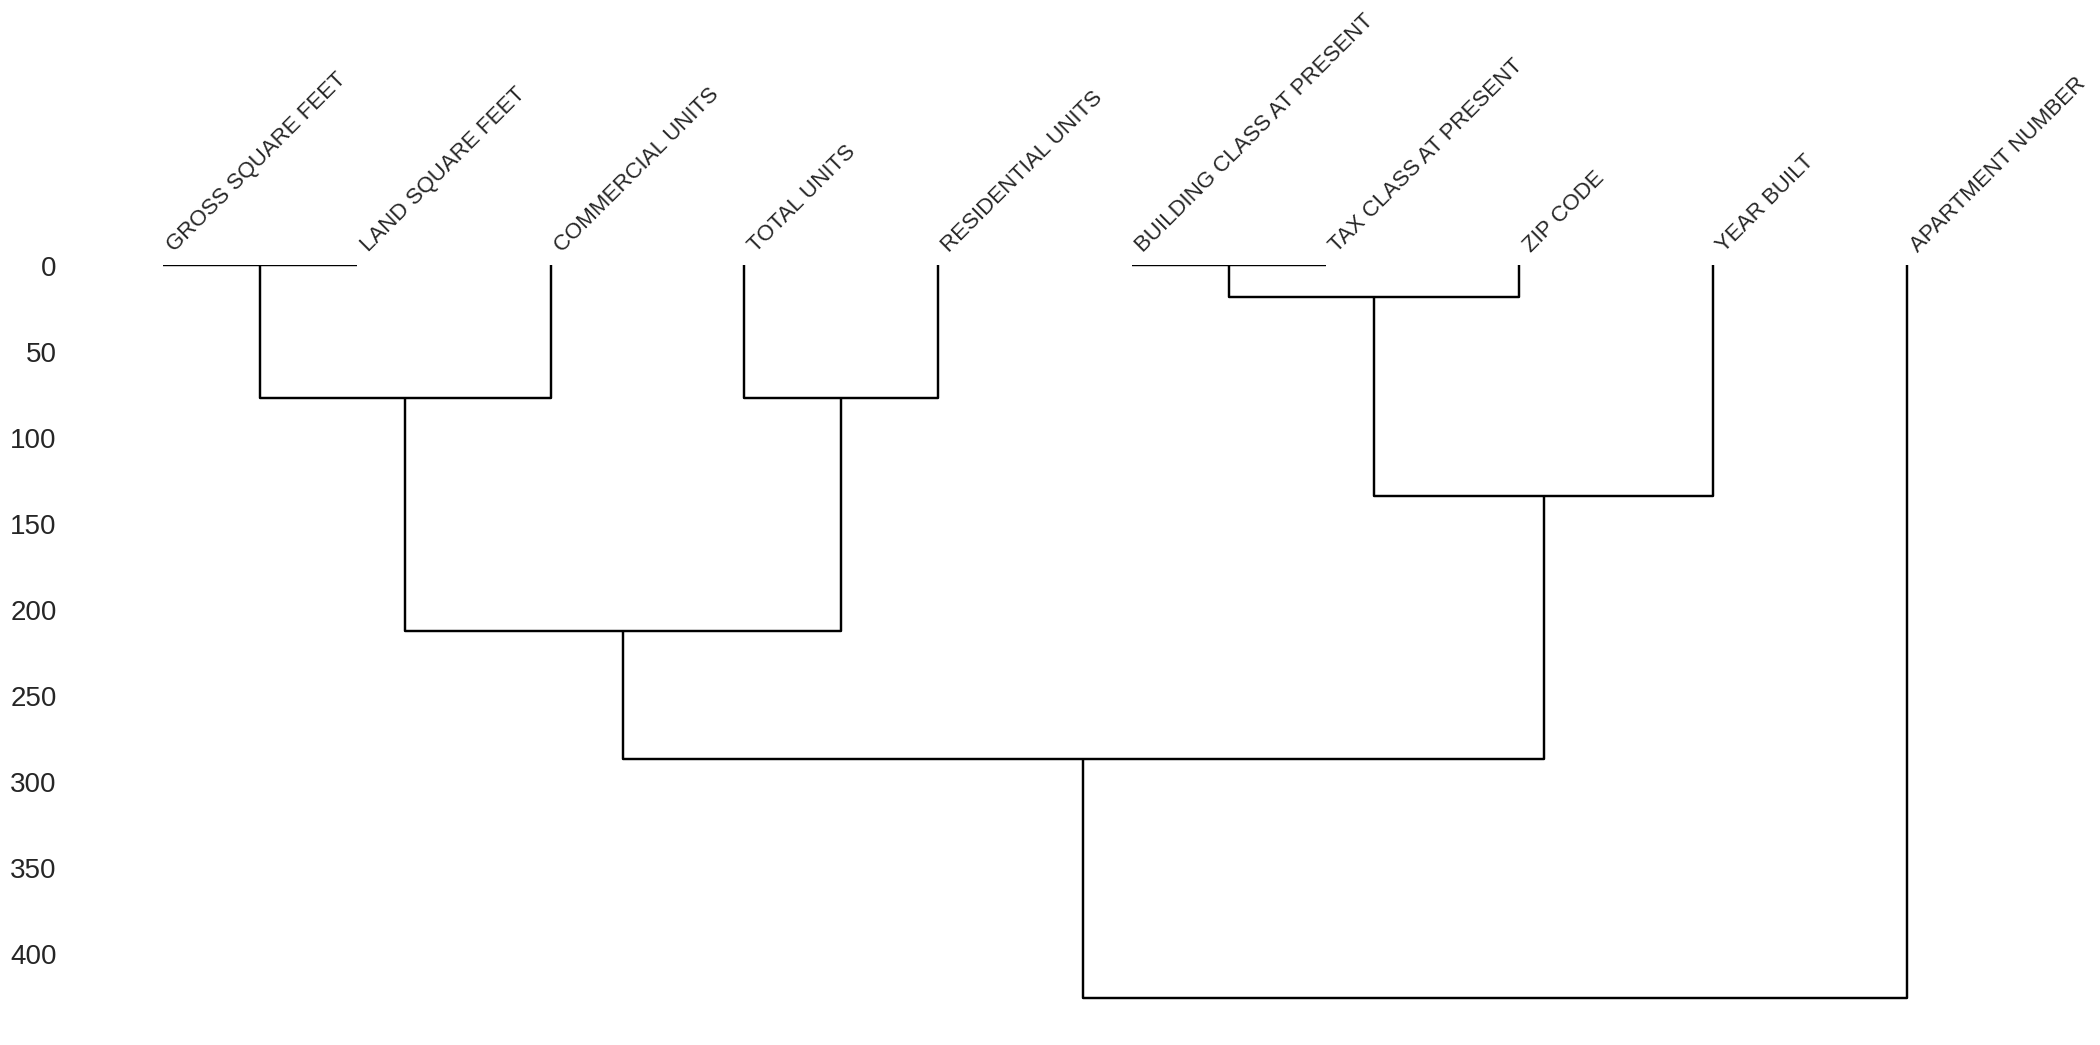

In [ ]:
# visualize missing values using msno package
missing_features = missing[missing>0] # features that do have missing values
missing_features_col_names = missing_features.index.values # missing values columns names

msno.bar(all_data[missing_features_col_names])
msno.matrix(all_data[missing_features_col_names])
msno.heatmap(all_data[missing_features_col_names])
msno.dendrogram(all_data[missing_features_col_names])


Patterns of missing values

* From the heatmap and dendogram and also msno matrix we can notice that the  "LAND SQUARE FEET" and "GROSS SQUARE FEET" features are having the "Unit Nonresponse Pattern" data missing pattern as they are being 100% missed together
* "COMMERCIAL UNITS" is also missed when both previous features are missed but not 100% and it seems to be having monotone pattern so they can be considered to be **MAR**.
* However there is still a possibility that there is an unobservable factor that is affecting all of them in this case they will be **MNAR**.
* For "APARTMENT NUMBER" feature although it will be dropped but in sake of discussion completence we can consider it to be **MCAR** as from the msno matrix the missing values are randomly distributed in the dataset

<ipython-input-9-58fcbf24cdca>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = all_data.corr()[['LAND SQUARE FEET', 'GROSS SQUARE FEET']]


<Axes: >

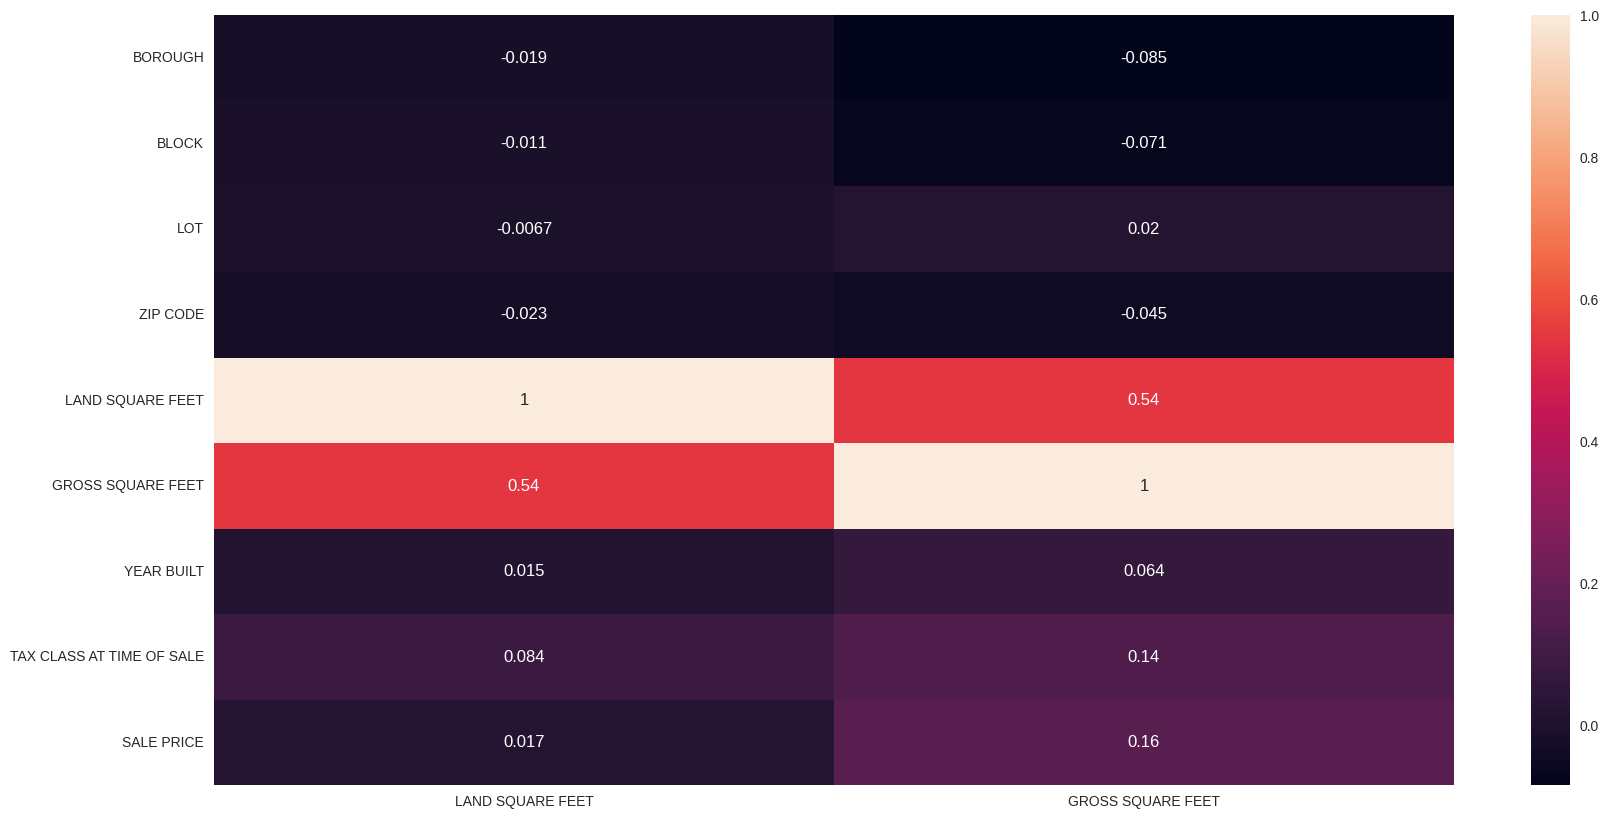

In [ ]:
# we can try to check if there is any correlation between 'LAND SQUARE FEET', 'GROSS SQUARE FEET' and any other numeric feature
fig, ax = plt.subplots(figsize=(20, 10))
corr = all_data.corr()[['LAND SQUARE FEET', 'GROSS SQUARE FEET']]
sns.heatmap(corr, annot=True)

In [ ]:
# we tried to check if there is any correlation between 'APARTMENT NUMBER' and other categorical features but the session crahses

#!pip install -q association-metrics
#import association_metrics as am
# Convert you str columns to Category columns
#df = all_data.apply(lambda x: x.astype("category") if x.dtype == "O" else x)

# Initialize a CamresV object using you pandas.DataFrame, CramersV is used for categorical-categorical features correlation
#cramersv = am.CramersV(df)
# will return a pairwise matrix filled with Cramer's V, where columns and index are
# the categorical variables of the passed pandas.DataFrame
#cramersv.fit()

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
#annot_labels = np.empty_like(cramersv.fit(), dtype=str)
#annot_mask = cramersv.fit() >= 0.5
#annot_labels[annot_mask] = 'T'

# Plot hearmap with the annotations
#fig, ax = plt.subplots(figsize=(30, 10))
#sns.heatmap(cramersv.fit(), ax=ax, annot=annot_labels, fmt='')



* So in summary the dataset contains numeric and categorical features and their statistics are shown in Q 1.1
* The are also 10 features that have missing values and the top 4 are "APARTMENT NUMBER", "LAND SQUARE FEET" and "GROSS SQUARE FEET" and "COMMERCIAL UNITS"
* The missing value mechanism for "LAND SQUARE FEET", "GROSS SQUARE FEET" and "COMMERCIAL UNITS" is MAR as they are missed together while "APARTMENT NUMBER" missing mechanism is MCAR




# Checking the normality of the target variable, i.e., 'SALE PRICE', using both graphical and statistical test methods.

## *Graphical Method*

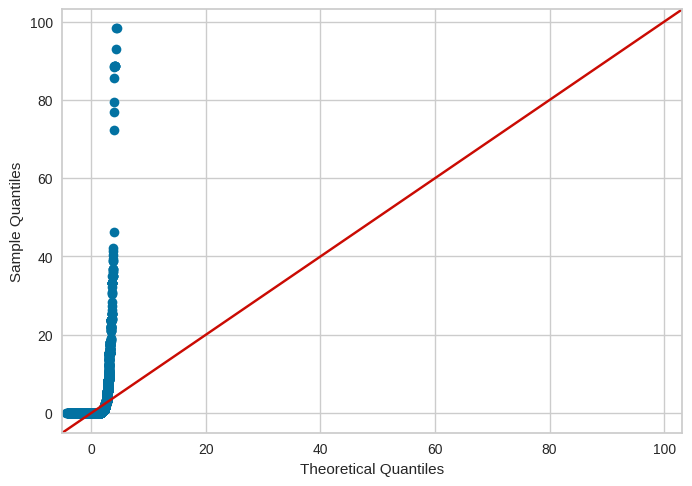

In [ ]:
# the normality test graphical methods.
# check if the SALE PRICE of the collected data points have been sampled from a normal distribution.
# use QQ plot and freuqency distribution.

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(all_data['SALE PRICE'], line='45', fit = True)
plt.show()

#frequency plot "Histogram"
fig = px.histogram(all_data, x="SALE PRICE")
fig.show()

<ipython-input-13-8d0a8620a681>:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




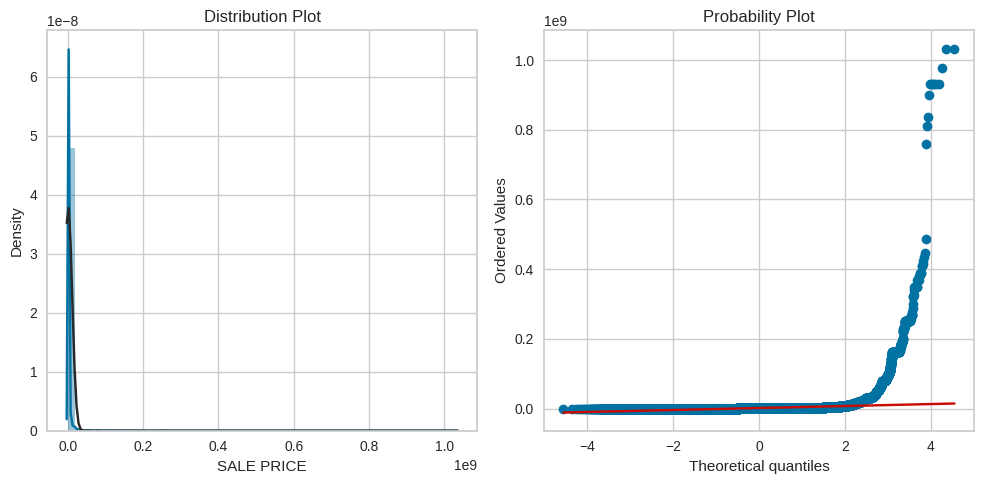

In [ ]:
# we can also used the defined function in Tutorial1_part1 which plots the KDE or PDF and the probability plot
# another way to perform normality check graphical method.
def normality_plot(X):
    """
    Given a feature it perfoms the following:
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # distribution plot
    # sns.distplot(X, fit=norm, ax=axes[0]) `distplot` is a deprecated function
    # use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
    # For a guide to updating your code to use the new functions, please see https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751
    #sns.histplot(X, ax=axes[0], kde=True, stat="density") # no fit=norm available :(
    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')


    #`probplot` generates a probability plot, which should not be confused with a Q-Q or a P-P plot.  Statsmodels has more extensive functionality of this type, see ``statsmodels.api.ProbPlot``
    # https://stats.stackexchange.com/questions/288209/is-probability-plot-a-member-of-qq-plot#:~:text=So%20Probability%20plot%20is%20a%20plot%20of%20samples,is%20a%20larger%20concept%20which%20includes%20Probability%20plot.
    # https://stats.stackexchange.com/questions/92141/pp-plots-vs-qq-plots?answertab=votes#tab-top

    axes[1] = stats.probplot((X), plot=plt)

    plt.tight_layout()

normality_plot(all_data['SALE PRICE'])

From the charts we can notice that the SALE PRICE is severely skewed and is not normally distributed

In [ ]:
# we can also calculate its skewness
# Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean, the skewness value can be positive, zero, negative, or undefined
label_skewness = all_data['SALE PRICE'].skew()
print("SALE PRICE skewness is:", label_skewness)

SALE PRICE skewness is: 46.154425879402915


## *Statistical Tests Method*

We will use Shapiro-wilk and D’Agostino-Pearson’s K² normality tests

In [ ]:
# Shapiro-wilk test, Its null hypothesis is that the data is normaly distributed
w, pvalue_1 = stats.shapiro(all_data['SALE PRICE']) #p value obtained from the Shapiro-Wilk test is significant (p < 0.05), we conclude that the data is not normally distributed
print("Shapiro-wilk test, p-value = {}".format(pvalue_1))

# D’Agostino-Pearson’s K² test
k2, pvalue_2 = stats.normaltest(all_data['SALE PRICE'])
print("D’Agostino-Pearson test, p-value = {}".format(pvalue_2))

# The chosen statistical significance threshold alpha
alpha = 0.05

# null hypothesis: x comes from a normal distribution
if pvalue_1 < alpha and pvalue_2 < alpha:
    print("Both statistical tests have p-value<0.05, So the result is statistically significant and the null hypothesis can be rejected.")
    print("We conclude that the SALE PRICE data is not normally distributed")
elif pvalue_1 > alpha and pvalue_2 > alpha:
    print("Both statistical tests have p-value>0.05, So the result is statistically non-significant and The null hypothesis cannot be rejected.")
    print("We conclude that the SALE PRICE data is normally distributed")
else:
    print("Both tests dont give consistent results, p-values are {} and {}".format(pvalue_1, pvalue_2))


Shapiro-wilk test, p-value = 0.0
D’Agostino-Pearson test, p-value = 0.0
Both statistical tests have p-value<0.05, So the result is statistically significant and the null hypothesis can be rejected.
We conclude that the SALE PRICE data is not normally distributed


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



Both graphical and statistical normality tests showed that the "SALE PRICE" is not normally distributed

# Hypothesis Testing


## *Hypothesis Test 1*

"Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?"

$H_0$ Null hypothesis: The NYC real estate market didn't change after the declaration of the COVID-19 pandemic in March of 2020

$H_1$ Alternative hypothesis: The NYC real estate market changed after the declaration of the COVID-19 pandemic in March of 2020


In [ ]:
all_data['SALE DATE'] = pd.to_datetime(all_data['SALE DATE']) # convert "SALE DATE" to datetime format to be able to apply operations on the date
print(all_data['SALE DATE'])

minimum_date = min(all_data['SALE DATE'])
maximum_date = max(all_data['SALE DATE'])

print("minimum date:",minimum_date)
print("maximum date:",maximum_date)

0        2020-07-02
1        2020-10-02
2        2020-06-24
3        2020-07-02
4        2020-01-14
            ...    
258459   2021-10-15
258460   2021-08-18
258461   2021-12-08
258462   2021-09-03
258463   2021-09-03
Name: SALE DATE, Length: 258464, dtype: datetime64[ns]
minimum date: 2020-01-01 00:00:00
maximum date: 2022-12-31 00:00:00


In [ ]:
sale_price_before_covid = all_data[all_data['SALE DATE'].between(minimum_date,'2020-02-29')]['SALE PRICE']
sale_price_after_covid = all_data[all_data['SALE DATE'].between('2020-03-01',maximum_date)]['SALE PRICE']

As we have seen before the "SALE PRICE" doesn't follow the normal distribution so we should use a non-parametric test also we are comparing two groups which are highly unpaired so we will use Mann-Whitney U/ Wilcoxon rank-sum t-test  

In [ ]:
# To test this hypothesis, we compare two sets of numeric values, i.e., SALE PRICE before and after COVID-19
# we should use Mann-Whitney U test as the data is two groups, non-parametric and unpaired groups
# perform two-sided test as we want to see if there is any difference in general which can be greater than or less than.

mannwhitneyu_ttest = stats.mannwhitneyu(x=sale_price_before_covid, y=sale_price_after_covid, alternative = 'two-sided')
mannwhitneyu_ttest

p_value = mannwhitneyu_ttest[1]
print("\n" "p-value is:", p_value)

# The chosen statistical significance threshold alpha
alpha = 0.05

if p_value < alpha:
    print("p-value<0.05, So the result is statistically significant and the null hypothesis can be rejected.")
    print("We conclude that there is a statistical significant difference in the NYC real estate market before and after the declaration of the COVID-19 pandemic in March of 2020")
else:
    print("p-value>0.05, So the result is statistically non-significant and the null hypothesis cannot be rejected.")
    print("We conclude that there is no statistical significant difference in the NYC real estate market before and after the declaration of the COVID-19 pandemic in March of 2020")

MannwhitneyuResult(statistic=1583065332.5, pvalue=1.581298780560428e-51)


p-value is: 1.581298780560428e-51
p-value<0.05, So the result is statistically significant and the null hypothesis can be rejected.
We conclude that there is a statistical significant difference in the NYC real estate market before and after the declaration of the COVID-19 pandemic in March of 2020


In [ ]:
# We can also check if SALE PRICE after COVID is higher than before it.
mannwhitneyu_ttest_2 = stats.mannwhitneyu(x=sale_price_after_covid, y=sale_price_before_covid, alternative = 'greater')
p_value = mannwhitneyu_ttest_2[1]
print("\n" "p-value is:", p_value)

if p_value < alpha:
    print("p-value<0.05, the null hypothesis can be rejected.")
    print("We conclude that the increase in SALE PRICE in NYC after COVID-19 is a statistically significant")
else:
    print("p-value>0.05,the null hypothesis cannot be rejected.")
    print("We conclude that there is no statistical significant increase in SALE PRICE in NYC after COVID-19")


p-value is: 7.90649390280214e-52
p-value<0.05, the null hypothesis can be rejected.
We conclude that the increase in SALE PRICE in NYC after COVID-19 is a statistically significant


Cliff's Delta Effect-Size

In [ ]:
#Will check effect size using cliff's delta as data is non-parametric if parametric use cohen's d
cliffs_delta(sale_price_before_covid, sale_price_after_covid)

#As the effect size < 0.147, the statistical significant differences between two groups is "negligible".

(-0.0748436576240131, 'negligible')

**Hypothesis Test 1**

p-value is: 1.581298780560428e-51

p-value < 0.05, So the result is statistically significant and the null hypothesis can be rejected. We conclude that there is a statistical significant difference in the NYC real estate market before and after the declaration of the COVID-19 pandemic in March of 2020. We checked if the prices have increased after COVID-19  and the p-value was: 7.90649390280214e-52 < 0.05, the null hypothesis can be rejected. We concluded that the increase in SALE PRICE in NYC after COVID-19 is a statistically significant.

However this statistical difference between the two groups is "negligible" as the effect size < 0.147



## *Hypothesis Test 2*

"Do properties in Manhattan sell at higher prices than properties elsewhere?"

$H_0$ Null hypothesis: Manhattan properties are sold at the same prices as other properties elsewhere

$H_1$ Alternative hypothesis: Manhattan properties are sold at higher prices than other properties elsewhere


In [ ]:
#check NEIGHBORHOOD
'MANHATTAN VALLEY' in all_data['NEIGHBORHOOD'].unique()

True

In [ ]:
manhattan_sale_prices = all_data[all_data['NEIGHBORHOOD'] == 'MANHATTAN VALLEY']['SALE PRICE']
elsewhere_sale_prices = all_data[all_data['NEIGHBORHOOD'] != 'MANHATTAN VALLEY']['SALE PRICE']

In [ ]:
# To test this hypothesis, we compare two sets of numeric values, i.e., SALE PRICE in Manhattan with other neighborhoods
# we should use Mann-Whitney U test as the data is two groups, non-parametric and unpaired groups
# perform one-sided test as we want to see if the SALE PRICE in Manhattan is higher than elsewhere

mannwhitneyu_ttest = stats.mannwhitneyu(x=manhattan_sale_prices, y=elsewhere_sale_prices, alternative = 'greater')
mannwhitneyu_ttest

p_value = mannwhitneyu_ttest[1]
print("\n" "p-value is:", p_value)

# The chosen statistical significance threshold alpha
alpha = 0.05

if p_value < alpha:
    print("p-value<0.05, the null hypothesis can be rejected.")
    print("We conclude that the Manhattan properties SALE PRICE is statistically significant higher than elsewhere")
else:
    print("p-value>0.05,the null hypothesis cannot be rejected.")
    print("We conclude that there is no statistical significant difference between Manhattann SALE PIRCE and elsewhere")

# Cliff's Delta Effect-Size
#Will check effect size using cliff's delta as data is non-parametric
cliffs_delta(manhattan_sale_prices, elsewhere_sale_prices)

#As the 0.147 < effect size < 0.33, the statistical significant differences between two groups is "Small".

MannwhitneyuResult(statistic=96009358.5, pvalue=2.270183728491299e-11)


p-value is: 2.270183728491299e-11
p-value<0.05, the null hypothesis can be rejected.
We conclude that the Manhattan properties SALE PRICE is statistically significant higher than elsewhere


(0.14760038485091628, 'small')

**Hypothesis Test 2**

p-value is: 2.270183728491299e-11 < 0.05, the null hypothesis can be rejected.
We conclude that the Manhattan properties are being sold at a statistically significant higher price than elsewhere.

However this statistical difference between the two groups is "Small" as the effect size is: 0.147 < |d| < 0.33

# Multiple Linear Regression

## Review the data information and structure again

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   BOROUGH                         258464 non-null  int64         
 1   NEIGHBORHOOD                    258464 non-null  object        
 2   BUILDING CLASS CATEGORY         258464 non-null  object        
 3   TAX CLASS AT PRESENT            258143 non-null  object        
 4   BLOCK                           258464 non-null  int64         
 5   LOT                             258464 non-null  int64         
 6   BUILDING CLASS AT PRESENT       258143 non-null  object        
 7   ADDRESS                         258464 non-null  object        
 8   APARTMENT NUMBER                62945 non-null   object        
 9   ZIP CODE                        258445 non-null  float64       
 10  RESIDENTIAL UNITS               199349 non-null  object 

In [ ]:
all_data.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,A5,4726 AMBOY ROAD,NaN,10312.0,1.0,0.0,1.0,3067.0,910.0,2002.0,1,A5,0.0,2020-07-02
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,NaN,10312.0,1.0,0.0,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2020-10-02
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,NaN,10312.0,1.0,0.0,1.0,6200.0,2580.0,1975.0,1,A1,450000.0,2020-06-24
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,NaN,10312.0,1.0,0.0,1.0,2500.0,1222.0,1925.0,1,A2,525000.0,2020-07-02
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,1845.0,1854.0,1986.0,1,A5,480000.0,2020-01-14


In [ ]:
# check categorical and ordinal features
df_ = all_data

for col in df_.columns:
    print(df_[col].value_counts()) # to print count of every category
    print("\n")
    print("----------------------------------------------------------")
    print("\n")

4    79552
3    74953
1    56960
5    25593
2    21406
Name: BOROUGH, dtype: int64


----------------------------------------------------------


FLUSHING-NORTH             8419
UPPER EAST SIDE (59-79)    5875
UPPER WEST SIDE (59-79)    5295
UPPER EAST SIDE (79-96)    5208
BOROUGH PARK               4410
                           ... 
BRONX PARK                    8
CO-OP CITY                    7
FRESH KILLS                   6
EAST RIVER                    1
AIRPORT JFK                   1
Name: NEIGHBORHOOD, Length: 255, dtype: int64


----------------------------------------------------------


01 ONE FAMILY DWELLINGS                       57236
02 TWO FAMILY DWELLINGS                       47632
13 CONDOS - ELEVATOR APARTMENTS               41602
10 COOPS - ELEVATOR APARTMENTS                40745
03 THREE FAMILY DWELLINGS                     13176
07 RENTALS - WALKUP APARTMENTS                 8492
09 COOPS - WALKUP APARTMENTS                   8242
04 TAX CLASS 1 CONDOS        

## Data Pre-processing

In [ ]:
#-----------------------------------------------------------
# Feature Name                    Action
#-----------------------------------------------------------
# BOROUGH                        should be categorical
# TAX CLASS AT TIME OF SALE      should be categorical


# APARTMENT NUMBER               should be dropped (no numeric merit)
# ZIP CODE                       should be dropped (no numeric merit)
# BLOCK                          should be dropped (A Tax Block is a sub-division of the borough)
# LOT                            should be dropped (A Tax Lot is a subdivision of a Tax Block)
# ADDRESS                        should be dropped
# Note: property location can be still distinguished using the NEIGHBORHOOD and BOROUGH features
# TOTAL UNITS                    should be dropped (to avoid multicolinearity as info is already captured in other two features "RESIDENTIAL UNITS" & "COMMERCIAL UNITS")

# RESIDENTIAL UNITS              should be numeric
# COMMERCIAL UNITS               should be numeric
# TOTAL UNITS                    should be numeric

#-----------------------------------------------------------
# Other Steps to be done
#-----------------------------------------------------------
# 1- Define new feature AGE to represent the property age at time of sale
# 2- Convert object dtypes to categorical
# 3- Remove cases at which SALE PRICE is zero as A $0 sale indicates that there was a transfer of ownership without a cash consideration.
#    There can be a number of reasons for a $0 sale including transfers of ownership from parents to children. src: https://www.nyc.gov/site/finance/taxes/glossary-property-sales.page
# 4- log-transform skewed features to be normally distributed
# 5- one hot encoding for categorical features
# 6- Missing values imputation
# 7- Standardization and scaling for numeric features

In [ ]:
# create a new feature to represent the property age at time of sale
all_data["AGE"] = all_data["SALE DATE"].apply(lambda x: x.year)- all_data["YEAR BUILT"]

In [ ]:
# convert datatime format of SALE DATE and replace it by the year only to be numeric
all_data["SALE DATE"] = all_data["SALE DATE"].apply(lambda x: x.year)

In [ ]:
# drop unneeded features
all_data = all_data.drop(columns=['APARTMENT NUMBER', 'ZIP CODE', 'BLOCK', 'LOT', 'ADDRESS', 'TOTAL UNITS'])

In [ ]:
# types conversions
# conversion to categorical
all_data[["BOROUGH", "TAX CLASS AT TIME OF SALE"]] = all_data[["BOROUGH", "TAX CLASS AT TIME OF SALE"]].astype('category')

# convert object columns to categorical
all_data[all_data.select_dtypes(include=['object']).columns] = all_data[all_data.select_dtypes(include=['object']).columns].astype('category')

In [ ]:
# conversion to numeric
# we will first check that there is no comma separated string numbers
all_data["RESIDENTIAL UNITS"] = all_data["RESIDENTIAL UNITS"].map(lambda x:float(x.replace(",", "")) if type(x) is str else x)
all_data["COMMERCIAL UNITS"] = all_data["COMMERCIAL UNITS"].map(lambda x:float(x.replace(",", "")) if type(x) is str else x)

# conversion to float as there are null values
all_data[["RESIDENTIAL UNITS", "COMMERCIAL UNITS"]] = all_data[["RESIDENTIAL UNITS", "COMMERCIAL UNITS"]].astype('float64')

In [ ]:
# $0 sale price entries removal as it is a transfer of ownership without a cash consideration
# when we sort the SALE PRICE acesndingly we can notice very low prices which can be also considered as a case of ownership transfer without cash consideration
# we will put a threshold of 100,000$, any SALE PRICE below this threshold, entry will be removed as the prices will not be indicative of the property value (Notice: this threshold is low and can be subject of tuning)
np.sort(all_data["SALE PRICE"].unique())[:50]

all_data = all_data.drop(all_data[all_data["SALE PRICE"] < 100000].index)

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       8.000e+00, 1.000e+01, 1.200e+01, 1.300e+01, 1.900e+01, 2.000e+01,
       2.500e+01, 3.000e+01, 5.000e+01, 1.000e+02, 1.250e+02, 2.500e+02,
       3.000e+02, 5.000e+02, 6.000e+02, 7.500e+02, 9.470e+02, 1.000e+03,
       1.200e+03, 1.235e+03, 1.250e+03, 1.400e+03, 1.500e+03, 1.506e+03,
       1.507e+03, 1.600e+03, 1.700e+03, 1.800e+03, 1.809e+03, 1.880e+03,
       1.883e+03, 1.993e+03, 2.000e+03, 2.001e+03, 2.028e+03, 2.050e+03,
       2.100e+03, 2.208e+03, 2.300e+03, 2.332e+03, 2.500e+03, 2.510e+03,
       2.520e+03, 2.535e+03])

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177014 entries, 1 to 258460
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   BOROUGH                         177014 non-null  category      
 1   NEIGHBORHOOD                    177014 non-null  category      
 2   BUILDING CLASS CATEGORY         177014 non-null  category      
 3   TAX CLASS AT PRESENT            176704 non-null  category      
 4   BUILDING CLASS AT PRESENT       176704 non-null  category      
 5   RESIDENTIAL UNITS               126633 non-null  float64       
 6   COMMERCIAL UNITS                96262 non-null   float64       
 7   LAND SQUARE FEET                92164 non-null   float64       
 8   GROSS SQUARE FEET               92164 non-null   float64       
 9   YEAR BUILT                      165209 non-null  float64       
 10  TAX CLASS AT TIME OF SALE       177014 non-null  categor

In [ ]:
# column-wise summary of missing values
all_data.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                310
BUILDING CLASS AT PRESENT           310
RESIDENTIAL UNITS                 50381
COMMERCIAL UNITS                  80752
LAND SQUARE FEET                  84850
GROSS SQUARE FEET                 84850
YEAR BUILT                        11805
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
AGE                               11805
dtype: int64

Skeweness Issue and Log-trasform for numeric data

In [ ]:
# calculate the skewness
# Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean, the skewness value can be positive, zero, negative, or undefined
skewness = all_data.skew().sort_values(ascending=False)
skewness[abs(skewness) > 1]

<ipython-input-68-8a3242f3b8de>:3: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



COMMERCIAL UNITS     145.819316
RESIDENTIAL UNITS    122.132786
GROSS SQUARE FEET     48.513805
LAND SQUARE FEET      39.058581
SALE PRICE            38.564561
dtype: float64

In [ ]:
# List of skewed columns
skewed_cols = list(skewness[abs(skewness) > 1].index) # returns the columns "features" names that are highly skewed in a list
skewed_cols

['COMMERCIAL UNITS',
 'RESIDENTIAL UNITS',
 'GROSS SQUARE FEET',
 'LAND SQUARE FEET',
 'SALE PRICE']

In [ ]:
# Log-transform skewed columns
for col_name in skewed_cols:
    all_data[col_name] = np.log(1 + all_data[col_name])

One hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

all_data_ohe = all_data.copy()
all_data_ohe = pd.get_dummies(all_data)


In [ ]:
all_data_ohe.head(5)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,AGE,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,NEIGHBORHOOD_AIRPORT JFK,NEIGHBORHOOD_AIRPORT LA GUARDIA,NEIGHBORHOOD_ALPHABET CITY,NEIGHBORHOOD_ANNADALE,NEIGHBORHOOD_ARDEN HEIGHTS,NEIGHBORHOOD_ARROCHAR,NEIGHBORHOOD_ARROCHAR-SHORE ACRES,NEIGHBORHOOD_ARVERNE,NEIGHBORHOOD_ASTORIA,NEIGHBORHOOD_BATH BEACH,NEIGHBORHOOD_BATHGATE,NEIGHBORHOOD_BAY RIDGE,NEIGHBORHOOD_BAYCHESTER,NEIGHBORHOOD_BAYSIDE,NEIGHBORHOOD_BEDFORD PARK/NORWOOD,NEIGHBORHOOD_BEDFORD STUYVESANT,NEIGHBORHOOD_BEECHHURST,NEIGHBORHOOD_BELLE HARBOR,NEIGHBORHOOD_BELLEROSE,NEIGHBORHOOD_BELMONT,NEIGHBORHOOD_BENSONHURST,NEIGHBORHOOD_BERGEN BEACH,NEIGHBORHOOD_BLOOMFIELD,NEIGHBORHOOD_BOERUM HILL,NEIGHBORHOOD_BOROUGH PARK,NEIGHBORHOOD_BREEZY POINT,NEIGHBORHOOD_BRIARWOOD,NEIGHBORHOOD_BRIGHTON BEACH,NEIGHBORHOOD_BROAD CHANNEL,NEIGHBORHOOD_BRONX PARK,NEIGHBORHOOD_BRONXDALE,NEIGHBORHOOD_BROOKLYN HEIGHTS,NEIGHBORHOOD_BROWNSVILLE,NEIGHBORHOOD_BULLS HEAD,NEIGHBORHOOD_BUSH TERMINAL,NEIGHBORHOOD_BUSHWICK,NEIGHBORHOOD_CAMBRIA HEIGHTS,...,BUILDING CLASS AT TIME OF SALE_R6,BUILDING CLASS AT TIME OF SALE_R7,BUILDING CLASS AT TIME OF SALE_R8,BUILDING CLASS AT TIME OF SALE_R9,BUILDING CLASS AT TIME OF SALE_RA,BUILDING CLASS AT TIME OF SALE_RB,BUILDING CLASS AT TIME OF SALE_RG,BUILDING CLASS AT TIME OF SALE_RH,BUILDING CLASS AT TIME OF SALE_RK,BUILDING CLASS AT TIME OF SALE_RP,BUILDING CLASS AT TIME OF SALE_RR,BUILDING CLASS AT TIME OF SALE_RS,BUILDING CLASS AT TIME OF SALE_RT,BUILDING CLASS AT TIME OF SALE_RW,BUILDING CLASS AT TIME OF SALE_S0,BUILDING CLASS AT TIME OF SALE_S1,BUILDING CLASS AT TIME OF SALE_S2,BUILDING CLASS AT TIME OF SALE_S3,BUILDING CLASS AT TIME OF SALE_S4,BUILDING CLASS AT TIME OF SALE_S5,BUILDING CLASS AT TIME OF SALE_S9,BUILDING CLASS AT TIME OF SALE_T1,BUILDING CLASS AT TIME OF SALE_T2,BUILDING CLASS AT TIME OF SALE_T9,BUILDING CLASS AT TIME OF SALE_V0,BUILDING CLASS AT TIME OF SALE_V1,BUILDING CLASS AT TIME OF SALE_V2,BUILDING CLASS AT TIME OF SALE_V3,BUILDING CLASS AT TIME OF SALE_V5,BUILDING CLASS AT TIME OF SALE_V6,BUILDING CLASS AT TIME OF SALE_V8,BUILDING CLASS AT TIME OF SALE_V9,BUILDING CLASS AT TIME OF SALE_W1,BUILDING CLASS AT TIME OF SALE_W2,BUILDING CLASS AT TIME OF SALE_W3,BUILDING CLASS AT TIME OF SALE_W4,BUILDING CLASS AT TIME OF SALE_W6,BUILDING CLASS AT TIME OF SALE_W7,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Y3,BUILDING CLASS AT TIME OF SALE_Y4,BUILDING CLASS AT TIME OF SALE_Y8,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z2,BUILDING CLASS AT TIME OF SALE_Z3,BUILDING CLASS AT TIME OF SALE_Z4,BUILDING CLASS AT TIME OF SALE_Z5,BUILDING CLASS AT TIME OF SALE_Z7,BUILDING CLASS AT TIME OF SALE_Z9
1,0.693147,0.0,8.987322,8.205492,1998.0,12.660331,2020,22.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.693147,0.0,8.732466,7.855932,1975.0,13.017005,2020,45.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.693147,0.0,7.824446,7.109062,1925.0,13.171155,2020,95.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.693147,0.0,7.520776,7.525640,1986.0,13.081543,2020,34.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.693147,0.0,8.291547,7.741099,2004.0,13.487008,2020,16.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Missing values Handling

Since we assumed the missing data to be either MAR with a possibility of unobservable factor leading to be MNAR we need to chose the imputation method wisely as simple imputations techniques or list-wise deletion can cause bias in the model to the complete cases in case of MAR/MNAR.
However in case of MCAR features we can impute them using simple imputations.


To check missing values impact we will check effect of list-wise deletion then we will asses different missing values imputation techniques to see if there is any bias introduced by the simple methods

- Univariate imputation

>> Simple Imputation using mean value

- Multivariate imputation

>> KNN Imputer

>> Iterative Imputer

Unfortuantely multivariate imputation techniques takes a lot of time and the session expires before execution completion so we couldn't asses their performance. so we are susceptible to the effect of bias due to simple imputations.

### Simple Imputation

We will first start with simple imputation which will fill the missing values with the mean value of the feature

In [ ]:
# make a copy
df_converted = all_data_ohe.copy()

# Before we start preprocessing, we need train/test split:
from sklearn.model_selection import train_test_split

df_converted_train, df_converted_test = train_test_split(df_converted, test_size=0.25)
len(df_converted_train), len(df_converted_test)
print("\n")
df_converted_test.info()

(132760, 44254)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 44254 entries, 125947 to 19787
Columns: 672 entries, RESIDENTIAL UNITS to BUILDING CLASS AT TIME OF SALE_Z9
dtypes: float64(7), int64(1), uint8(664)
memory usage: 31.1 MB


In [ ]:
# use SimpleImputer to predict missing value
from sklearn.impute import SimpleImputer

# replace with constant
imputer = SimpleImputer(strategy='mean')

train_features = imputer.fit_transform(df_converted_train)

test_features = imputer.transform(df_converted_test)

# the results above are numpy arrays
# you can make it back to a dataframe for either train/test array

simple_imputed_train = pd.DataFrame(
    train_features,
    columns=df_converted_train.columns
    )

simple_imputed_test = pd.DataFrame(
    test_features,
    columns=df_converted_test.columns
    )


In [ ]:
print("NAs count in training set",simple_imputed_train.isna().values.sum())
print("NAs count in testing set", simple_imputed_test.isna().values.sum())

NAs count in training set 0
NAs count in testing set 0


Numeric feature scaling

In [ ]:
# check data statistics before scaling
simple_imputed_train.describe(include  ="all")

,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,AGE,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,NEIGHBORHOOD_AIRPORT JFK,NEIGHBORHOOD_AIRPORT LA GUARDIA,NEIGHBORHOOD_ALPHABET CITY,NEIGHBORHOOD_ANNADALE,NEIGHBORHOOD_ARDEN HEIGHTS,NEIGHBORHOOD_ARROCHAR,NEIGHBORHOOD_ARROCHAR-SHORE ACRES,NEIGHBORHOOD_ARVERNE,NEIGHBORHOOD_ASTORIA,NEIGHBORHOOD_BATH BEACH,NEIGHBORHOOD_BATHGATE,NEIGHBORHOOD_BAY RIDGE,NEIGHBORHOOD_BAYCHESTER,NEIGHBORHOOD_BAYSIDE,NEIGHBORHOOD_BEDFORD PARK/NORWOOD,NEIGHBORHOOD_BEDFORD STUYVESANT,NEIGHBORHOOD_BEECHHURST,NEIGHBORHOOD_BELLE HARBOR,NEIGHBORHOOD_BELLEROSE,NEIGHBORHOOD_BELMONT,NEIGHBORHOOD_BENSONHURST,NEIGHBORHOOD_BERGEN BEACH,NEIGHBORHOOD_BLOOMFIELD,NEIGHBORHOOD_BOERUM HILL,NEIGHBORHOOD_BOROUGH PARK,NEIGHBORHOOD_BREEZY POINT,NEIGHBORHOOD_BRIARWOOD,NEIGHBORHOOD_BRIGHTON BEACH,NEIGHBORHOOD_BROAD CHANNEL,NEIGHBORHOOD_BRONX PARK,NEIGHBORHOOD_BRONXDALE,NEIGHBORHOOD_BROOKLYN HEIGHTS,NEIGHBORHOOD_BROWNSVILLE,NEIGHBORHOOD_BULLS HEAD,NEIGHBORHOOD_BUSH TERMINAL,NEIGHBORHOOD_BUSHWICK,NEIGHBORHOOD_CAMBRIA HEIGHTS,...,BUILDING CLASS AT TIME OF SALE_R6,BUILDING CLASS AT TIME OF SALE_R7,BUILDING CLASS AT TIME OF SALE_R8,BUILDING CLASS AT TIME OF SALE_R9,BUILDING CLASS AT TIME OF SALE_RA,BUILDING CLASS AT TIME OF SALE_RB,BUILDING CLASS AT TIME OF SALE_RG,BUILDING CLASS AT TIME OF SALE_RH,BUILDING CLASS AT TIME OF SALE_RK,BUILDING CLASS AT TIME OF SALE_RP,BUILDING CLASS AT TIME OF SALE_RR,BUILDING CLASS AT TIME OF SALE_RS,BUILDING CLASS AT TIME OF SALE_RT,BUILDING CLASS AT TIME OF SALE_RW,BUILDING CLASS AT TIME OF SALE_S0,BUILDING CLASS AT TIME OF SALE_S1,BUILDING CLASS AT TIME OF SALE_S2,BUILDING CLASS AT TIME OF SALE_S3,BUILDING CLASS AT TIME OF SALE_S4,BUILDING CLASS AT TIME OF SALE_S5,BUILDING CLASS AT TIME OF SALE_S9,BUILDING CLASS AT TIME OF SALE_T1,BUILDING CLASS AT TIME OF SALE_T2,BUILDING CLASS AT TIME OF SALE_T9,BUILDING CLASS AT TIME OF SALE_V0,BUILDING CLASS AT TIME OF SALE_V1,BUILDING CLASS AT TIME OF SALE_V2,BUILDING CLASS AT TIME OF SALE_V3,BUILDING CLASS AT TIME OF SALE_V5,BUILDING CLASS AT TIME OF SALE_V6,BUILDING CLASS AT TIME OF SALE_V8,BUILDING CLASS AT TIME OF SALE_V9,BUILDING CLASS AT TIME OF SALE_W1,BUILDING CLASS AT TIME OF SALE_W2,BUILDING CLASS AT TIME OF SALE_W3,BUILDING CLASS AT TIME OF SALE_W4,BUILDING CLASS AT TIME OF SALE_W6,BUILDING CLASS AT TIME OF SALE_W7,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Y3,BUILDING CLASS AT TIME OF SALE_Y4,BUILDING CLASS AT TIME OF SALE_Y8,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z2,BUILDING CLASS AT TIME OF SALE_Z3,BUILDING CLASS AT TIME OF SALE_Z4,BUILDING CLASS AT TIME OF SALE_Z5,BUILDING CLASS AT TIME OF SALE_Z7,BUILDING CLASS AT TIME OF SALE_Z9
count,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.00000,132760.000000,132760.000000,132760.000000,...,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.0,132760.000000,132760.000000,132760.000000,132760.000000,132760

In [ ]:
#feature scaling and dummy attributes creation
numerical_cols = list(all_data.select_dtypes(include=['float64', 'int64']).columns)

#for sale_price we do not want to scale it
numerical_cols.remove('SALE PRICE')

scaler = RobustScaler()
# training set
simple_imputed_train[numerical_cols] = scaler.fit_transform(simple_imputed_train[numerical_cols])

# testing set
simple_imputed_test[numerical_cols] = scaler.transform(simple_imputed_test[numerical_cols])


In [ ]:
simple_imputed_train.describe(include  ="all") # to notice the changes after scaling

,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,AGE,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,NEIGHBORHOOD_AIRPORT JFK,NEIGHBORHOOD_AIRPORT LA GUARDIA,NEIGHBORHOOD_ALPHABET CITY,NEIGHBORHOOD_ANNADALE,NEIGHBORHOOD_ARDEN HEIGHTS,NEIGHBORHOOD_ARROCHAR,NEIGHBORHOOD_ARROCHAR-SHORE ACRES,NEIGHBORHOOD_ARVERNE,NEIGHBORHOOD_ASTORIA,NEIGHBORHOOD_BATH BEACH,NEIGHBORHOOD_BATHGATE,NEIGHBORHOOD_BAY RIDGE,NEIGHBORHOOD_BAYCHESTER,NEIGHBORHOOD_BAYSIDE,NEIGHBORHOOD_BEDFORD PARK/NORWOOD,NEIGHBORHOOD_BEDFORD STUYVESANT,NEIGHBORHOOD_BEECHHURST,NEIGHBORHOOD_BELLE HARBOR,NEIGHBORHOOD_BELLEROSE,NEIGHBORHOOD_BELMONT,NEIGHBORHOOD_BENSONHURST,NEIGHBORHOOD_BERGEN BEACH,NEIGHBORHOOD_BLOOMFIELD,NEIGHBORHOOD_BOERUM HILL,NEIGHBORHOOD_BOROUGH PARK,NEIGHBORHOOD_BREEZY POINT,NEIGHBORHOOD_BRIARWOOD,NEIGHBORHOOD_BRIGHTON BEACH,NEIGHBORHOOD_BROAD CHANNEL,NEIGHBORHOOD_BRONX PARK,NEIGHBORHOOD_BRONXDALE,NEIGHBORHOOD_BROOKLYN HEIGHTS,NEIGHBORHOOD_BROWNSVILLE,NEIGHBORHOOD_BULLS HEAD,NEIGHBORHOOD_BUSH TERMINAL,NEIGHBORHOOD_BUSHWICK,NEIGHBORHOOD_CAMBRIA HEIGHTS,...,BUILDING CLASS AT TIME OF SALE_R6,BUILDING CLASS AT TIME OF SALE_R7,BUILDING CLASS AT TIME OF SALE_R8,BUILDING CLASS AT TIME OF SALE_R9,BUILDING CLASS AT TIME OF SALE_RA,BUILDING CLASS AT TIME OF SALE_RB,BUILDING CLASS AT TIME OF SALE_RG,BUILDING CLASS AT TIME OF SALE_RH,BUILDING CLASS AT TIME OF SALE_RK,BUILDING CLASS AT TIME OF SALE_RP,BUILDING CLASS AT TIME OF SALE_RR,BUILDING CLASS AT TIME OF SALE_RS,BUILDING CLASS AT TIME OF SALE_RT,BUILDING CLASS AT TIME OF SALE_RW,BUILDING CLASS AT TIME OF SALE_S0,BUILDING CLASS AT TIME OF SALE_S1,BUILDING CLASS AT TIME OF SALE_S2,BUILDING CLASS AT TIME OF SALE_S3,BUILDING CLASS AT TIME OF SALE_S4,BUILDING CLASS AT TIME OF SALE_S5,BUILDING CLASS AT TIME OF SALE_S9,BUILDING CLASS AT TIME OF SALE_T1,BUILDING CLASS AT TIME OF SALE_T2,BUILDING CLASS AT TIME OF SALE_T9,BUILDING CLASS AT TIME OF SALE_V0,BUILDING CLASS AT TIME OF SALE_V1,BUILDING CLASS AT TIME OF SALE_V2,BUILDING CLASS AT TIME OF SALE_V3,BUILDING CLASS AT TIME OF SALE_V5,BUILDING CLASS AT TIME OF SALE_V6,BUILDING CLASS AT TIME OF SALE_V8,BUILDING CLASS AT TIME OF SALE_V9,BUILDING CLASS AT TIME OF SALE_W1,BUILDING CLASS AT TIME OF SALE_W2,BUILDING CLASS AT TIME OF SALE_W3,BUILDING CLASS AT TIME OF SALE_W4,BUILDING CLASS AT TIME OF SALE_W6,BUILDING CLASS AT TIME OF SALE_W7,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Y3,BUILDING CLASS AT TIME OF SALE_Y4,BUILDING CLASS AT TIME OF SALE_Y8,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z2,BUILDING CLASS AT TIME OF SALE_Z3,BUILDING CLASS AT TIME OF SALE_Z4,BUILDING CLASS AT TIME OF SALE_Z5,BUILDING CLASS AT TIME OF SALE_Z7,BUILDING CLASS AT TIME OF SALE_Z9
count,1.327600e+05,1.327600e+05,1.327600e+05,1.327600e+05,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.00000,132760.000000,132760.000000,132760.000000,...,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.000000,132760.0,132760.000000,132760.000000,132760.000000,132760.000000,132760.000

In [ ]:
# features
X_train = simple_imputed_train.drop(['SALE PRICE'], axis='columns')
X_test  = simple_imputed_test.drop(['SALE PRICE'], axis='columns')

# labels
y_train = simple_imputed_train['SALE PRICE']
y_test = simple_imputed_test['SALE PRICE']


Using the same template that was provided at Tutorial1_part2 we will train and fit linear regression models

Models Instantiation

In [ ]:
# a multiple linear regression model
model_base = linear_model.LinearRegression()

# With Ridge
lambda_list_ridge = list(np.linspace(20, 25, 101))
model_ridge = Ridge(alpha=lambda_list_ridge[0])

In [ ]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def train_test(model):
    print(model)
    model.fit(X_train.values, y_train.values)
    print("RMSE train log-scale: {}".format(rmse(y_train.values, model.predict(X_train.values))))
    print("RMSE test log-scale: {}".format(rmse(y_test.values,  model.predict(X_test.values))))

    visualizer = ResidualsPlot(model)

    visualizer.fit(X_train.values, y_train.values)  # Fit the training data to the visualizer
    visualizer.score(X_test.values, y_test.values)  # Evaluate the model on the test data
    visualizer.show()                 # Finalize and render the figure
    plt.scatter(y_test, np.exp(model.predict(X_test.values))-1, s=5 )

    # Real vs Predicted Housing Prices Plotting
    plt.scatter(y_test, model.predict(X_test.values), s=5 )
    plt.xlabel('Real Price')
    plt.ylabel('Predicted Price')
    plt.title( "Real vs Predicted Housing Prices")
    plt.show()

    # Error (Residuals) vs Real Plotting
    plt.scatter( y_test,model.predict(X_test.values)-y_test, s=5)
    plt.xlabel('Real Price')
    plt.ylabel('Residual')
    plt.title( "Residuals vs Real")
    plt.show()


LinearRegression()
RMSE train log-scale: 0.6873882774564494
RMSE test log-scale: 26496197.55198758


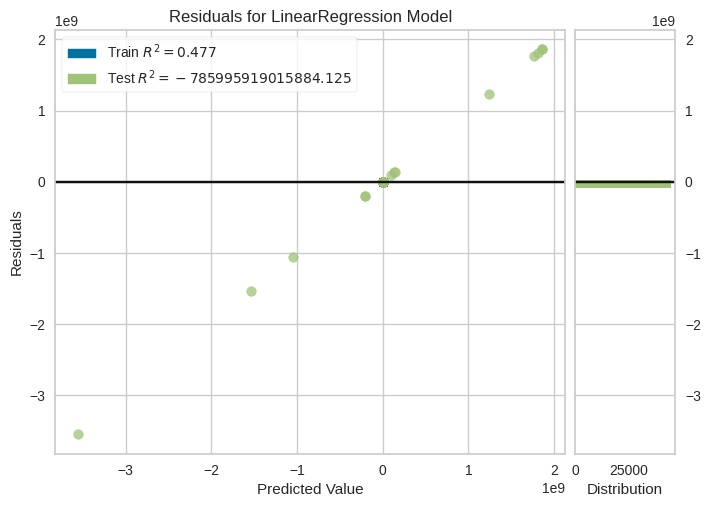

<ipython-input-132-c45dc1c84972>:16: RuntimeWarning:

overflow encountered in exp



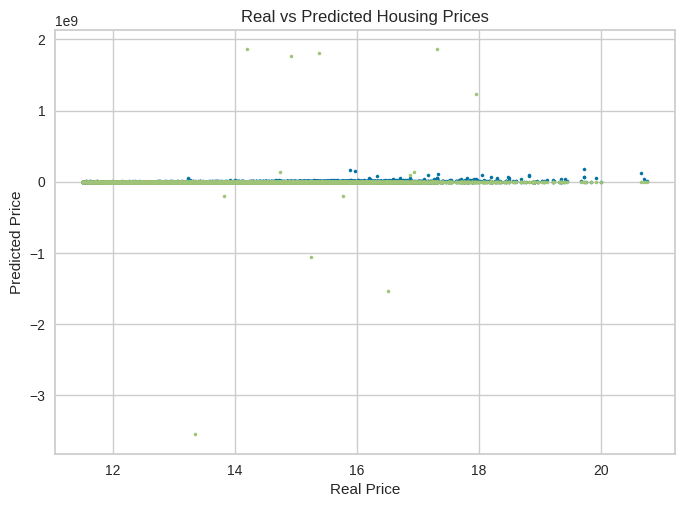

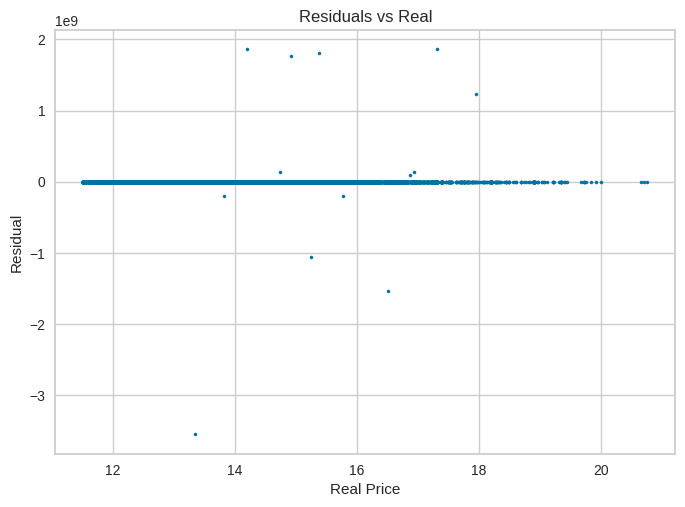

Ridge(alpha=20.0)
RMSE train log-scale: 0.6891837006150325
RMSE test log-scale: 0.6822655784309246


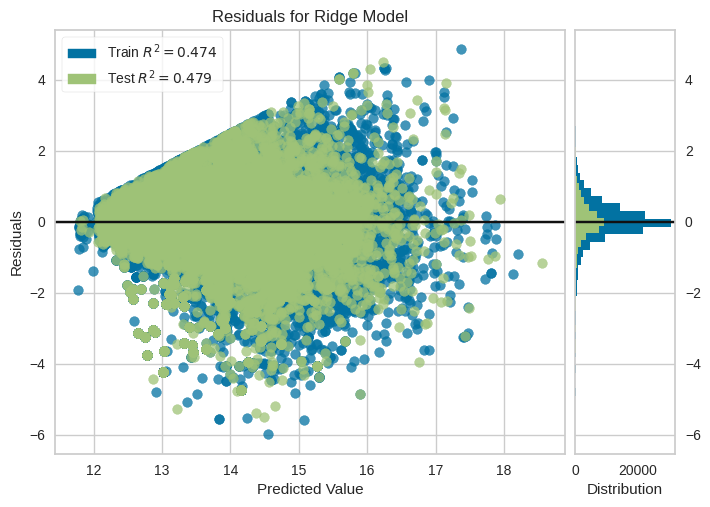

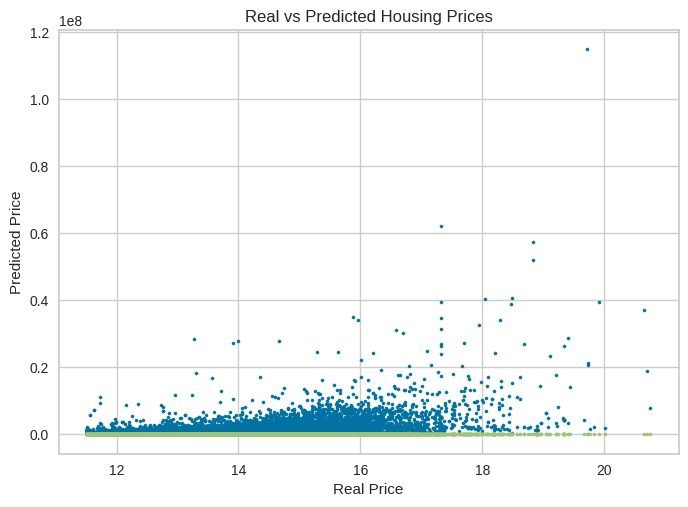

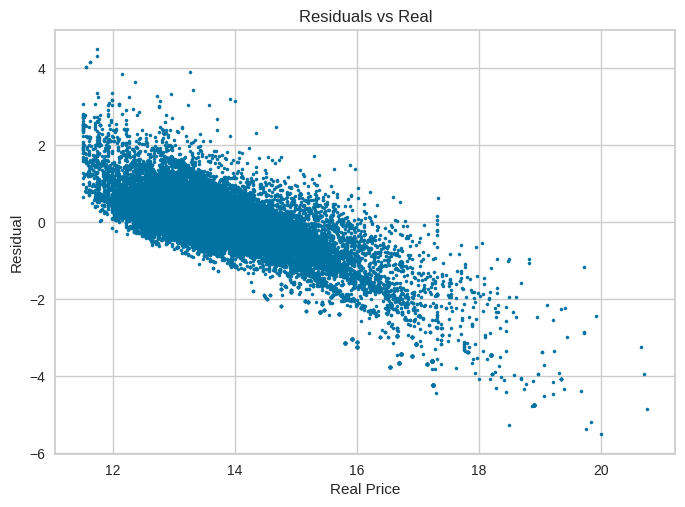

In [ ]:
for model in [model_base, model_ridge]:
    train_test(model)

* **LinearRegression model results**

>> RMSE train log-scale: 0.687

>> RMSE test log-scale: 26496197.552


* **Ridge(alpha=20.0) model**

>> RMSE train log-scale: 0.689

>> RMSE test log-scale: 0.682

* we can notice that the basic linear regression model is severly overfitting as RMSE test >> RMSE train

* Ridge model is having a proper fit where RMSE test ~ RMSE train however it is non-interpretable as the RMSE is in the log scale of the SALE PRICE and not in $.

Features that are significantly relevant to sale price based on the results of regression model can be obtained by checking which features have the highest coefficients. Below we list them.

In [ ]:
pd.DataFrame(zip(X_train.columns,model_ridge.coef_ )).sort_values(by = 1)

,0,1
108,NEIGHBORHOOD_GERRITSEN BEACH,-0.754500
305,BUILDING CLASS CATEGORY_44 CONDO PARKING,-0.732127
192,NEIGHBORHOOD_PARKCHESTER,-0.698575
49,NEIGHBORHOOD_CANARSIE,-0.694202
124,NEIGHBORHOOD_HARLEM-EAST,-0.669068
...,...,...
43,NEIGHBORHOOD_BROOKLYN HEIGHTS,0.793011
105,NEIGHBORHOOD_FORT GREENE,0.804502
160,NEIGHBORHOOD_MELROSE/CONCOURSE,0.810032
7,BOROUGH_1,0.834670


### List-wise deletion

Now we will see effect of list-wise deletion in which we will delete any row that contains missing values

In [ ]:
# make a copy
df_converted = all_data_ohe.copy()
df_converted = df_converted.dropna() # drop rows that contain missing values
print("NAs count in data set:", df_converted.isna().values.sum())


NAs count in data set: 0


In [ ]:
# Before we start preprocessing, we need train/test split:
from sklearn.model_selection import train_test_split

df_converted_train, df_converted_test = train_test_split(df_converted, test_size=0.25)
len(df_converted_train), len(df_converted_test)
print("\n")
df_converted_test.info()

(65703, 21902)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 21902 entries, 198884 to 78693
Columns: 672 entries, RESIDENTIAL UNITS to BUILDING CLASS AT TIME OF SALE_Z9
dtypes: float64(7), int64(1), uint8(664)
memory usage: 15.4 MB


In [ ]:
#feature scaling and dummy attributes creation
numerical_cols = list(all_data.select_dtypes(include=['float64', 'int64']).columns)

#for sale_price we do not want to scale it
numerical_cols.remove('SALE PRICE')

scaler = RobustScaler()
# training set
df_converted_train[numerical_cols] = scaler.fit_transform(df_converted_train[numerical_cols])

# testing set
df_converted_test[numerical_cols] = scaler.transform(df_converted_test[numerical_cols])


# features
X_train = df_converted_train.drop(['SALE PRICE'], axis='columns')
X_test  = df_converted_test.drop(['SALE PRICE'], axis='columns')

# labels
y_train = df_converted_train['SALE PRICE']
y_test = df_converted_test['SALE PRICE']



LinearRegression()
RMSE train log-scale: 0.49725321498341285
RMSE test log-scale: 95073104.05439256


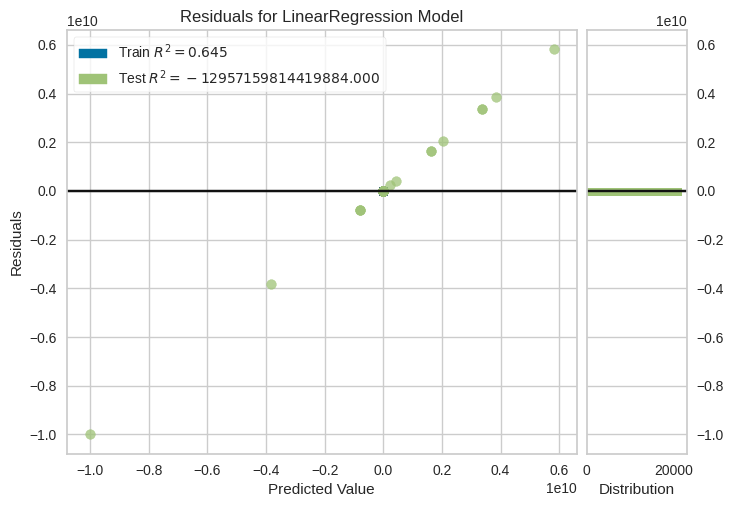

<ipython-input-132-c45dc1c84972>:16: RuntimeWarning:

overflow encountered in exp



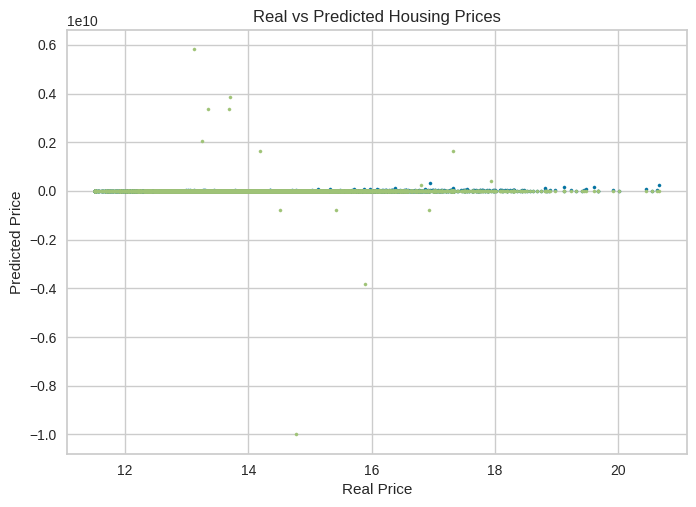

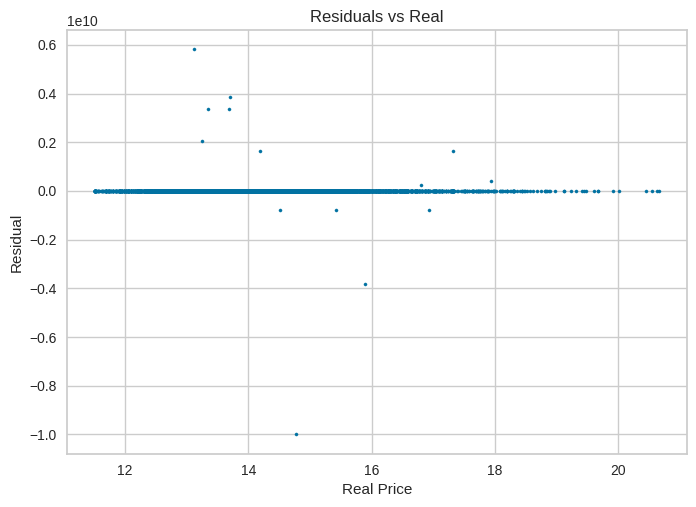

Ridge(alpha=20.0)
RMSE train log-scale: 0.5048068092849072
RMSE test log-scale: 0.5027363568011642


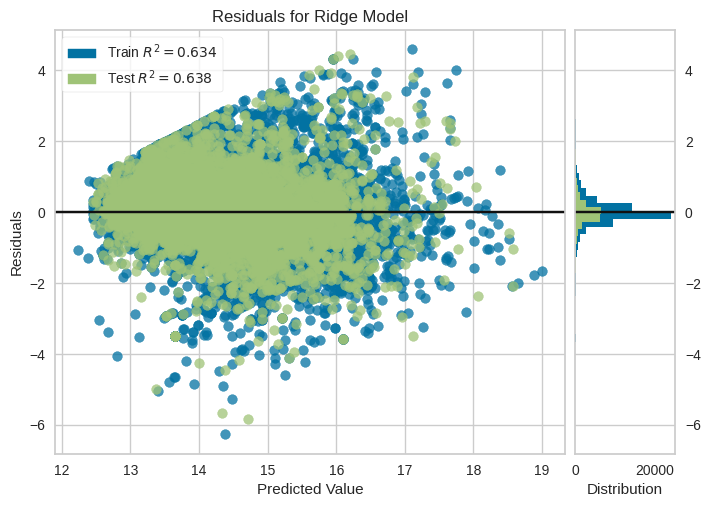

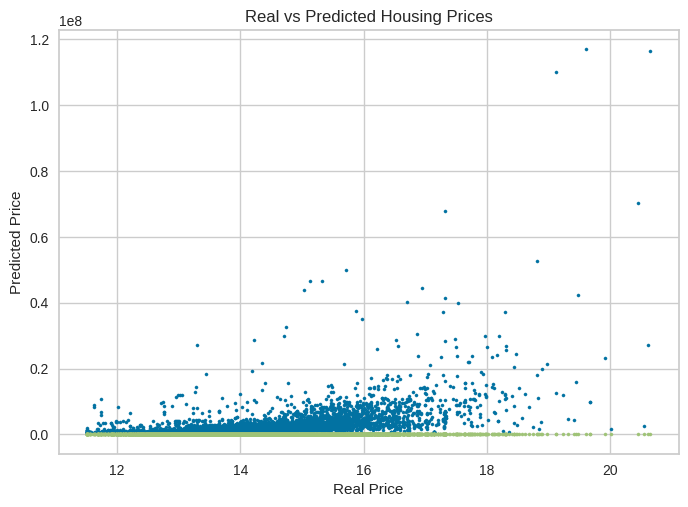

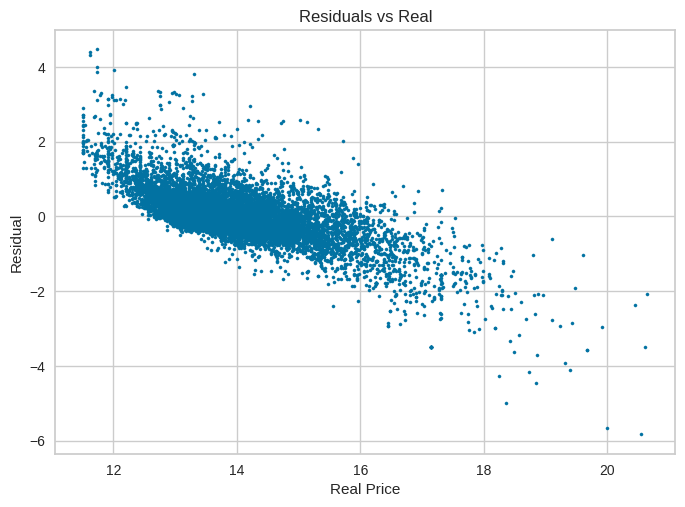

In [ ]:
# a multiple linear regression model
model_base = linear_model.LinearRegression()

# With Ridge
lambda_list_ridge = list(np.linspace(20, 25, 101))
model_ridge = Ridge(alpha=lambda_list_ridge[0])

# models training
for model in [model_base, model_ridge]:
    train_test(model)

* **LinearRegression model results**

>> RMSE train log-scale: 0.497

>> RMSE test log-scale: 95073104.054


* **Ridge(alpha=20.0) model**

>> RMSE train log-scale: 0.505

>> RMSE test log-scale: 0.503



* we can notice that here also when using list-wise deletion the basic linear regression model is severly overfitting as RMSE test >> RMSE train

* However Ridge Regularization model is having a proper fit where RMSE test ~ RMSE train however it is non-interpretable as the RMSE is in the log scale of the SALE PRICE and not in $.

* we finally notice that the for this dataset and the performed data preprocessing list-wise deletion is having lower train and test RMSE compared with the simple imputation for the missing values

>> RMSE test log-scale (list-wise deletion case): 0.503

>> RMSE test log-scale(simple mean imputation case): 0.682

Features that are significantly relevant to sale price based on the results of regression model can be obtained by checking which features have the highest coefficients as listed below.

In [ ]:
pd.DataFrame(zip(X_train.columns,model_ridge.coef_ )).sort_values(by = 1)

,0,1
353,BUILDING CLASS AT PRESENT_D8,-0.816577
530,BUILDING CLASS AT TIME OF SALE_D8,-0.816577
454,BUILDING CLASS AT PRESENT_RR,-0.771190
124,NEIGHBORHOOD_HARLEM-EAST,-0.720222
44,NEIGHBORHOOD_BROWNSVILLE,-0.662141
...,...,...
120,NEIGHBORHOOD_GREENWICH VILLAGE-WEST,0.773550
141,NEIGHBORHOOD_JAVITS CENTER,0.795185
43,NEIGHBORHOOD_BROOKLYN HEIGHTS,0.804775
468,BUILDING CLASS AT PRESENT_V1,0.848295


By comparing SimpleImputer using mean value and the list-wise deletion, for this dataset and preprocessing done the list-wise deletion is having lower RMSE on both training and testing.

### Iterative Imputer

we tried to use Iterative Imputer or KNN Imputer as a multi-variate imputation methods to compare their results with the simple mean imputation and list-wise deletion but it took so much time and session expires before the execution is completed so we couldn't asses multivariate imputation techniques

In [ ]:
# IterativeImputer: missing value is a function of the other values
from sklearn.experimental import enable_iterative_imputer # explicitly require this experimental feature
from sklearn.impute import IterativeImputer # now you can import normally from sklearn.impute

imputer = IterativeImputer(max_iter=10, random_state=0)

train_features_iter = imputer.fit_transform(df_converted_train)

test_features_iter = imputer.transform(df_converted_test)

# the results above are numpy arrays
# you can make it back to a dataframe for either train/test array
iter_imputed_train = pd.DataFrame(
    train_features_iter,
    columns=df_converted_train.columns
    )

iter_imputed_test = pd.DataFrame(
    test_features_iter,
    columns=df_converted_test.columns
    )

* We tried two missing values handling techniques and two linear regression models for each case

>> List-wise deletion (Basic LinearRegression model / Ridge Regularization model)

>> Simple mean imputation (Basic LinearRegression model / Ridge Regularization model)

* The basic linear regression model in both cases was severly overfitting
* The ridge regularization model fits the data in both cases more properly however the RMSE is not interpretable as it is the log-transform of the SALE PRICE
* For this specific dataset and the preprocessing done it was shown that the list-wise deletion is having smaller train and test RMSE compared with the simple mean imputation model.
* highest significant feature for the models SALE PRICE is:

>> for the simple-mean imputation ridge model: "NEIGHBORHOOD_COBBLE HILL"

>> for the list-wise deletion ridge model: "BOROUGH_1"

* The complete list of the most significant features for the SALE PRICE is mentioned under each model section